In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz

import pydotplus
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import graphviz

# Pretraitement de données

In [2]:
#import dataset from CSV
df = pd.read_csv('titanic-passengers.csv',sep = ";")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [3]:
# Les valeurs manquantes
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
#Preprocessing our data
def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    new_data["Embarked"]=new_data.Embarked.fillna("S")
    new_data["Cabin"]=encoder.fit_transform(new_data["Cabin"])
    return new_data
df=preprocess_data(df)

In [5]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,145,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,140,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,145,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,145,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,38,S


# ensemble d'apprentissage et un ensemble de test

In [7]:
X =df[["Age","Pclass","Cabin","Sex"]]
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)

# Arbre de decision

In [8]:
clf = tree.DecisionTreeClassifier(criterion = "gini",max_depth=3)  
clf.fit(X_train, y_train)   #fitting our model
y_pred=clf.predict(X_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7873134328358209


In [9]:
#plot_tree(clf,feature_names=["Age","Pclass","Cabin","Sex"],class_names=["Survived","not Survived"],filled=True)

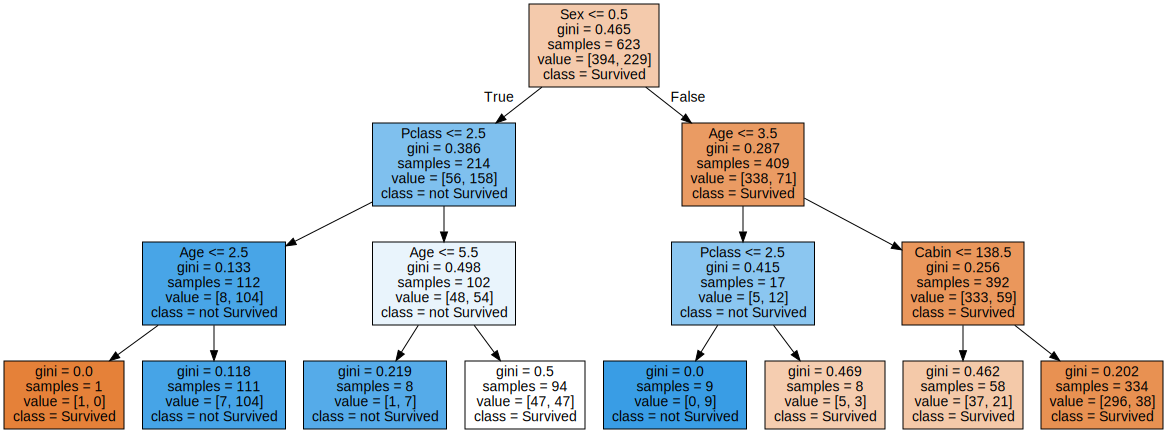

In [10]:
dot_data = tree.export_graphviz(clf,out_file=None,feature_names=["Age","Pclass","Cabin","Sex"],class_names=["Survived","not Survived"],filled=True)
graph = graphviz.Source(dot_data)
graph.render("df")
graph

In [11]:
clf = tree.DecisionTreeClassifier(criterion = "entropy",splitter ="random",max_leaf_nodes=20,min_samples_leaf =5,max_depth= 3)  
clf.fit(X_train, y_train)   #fitting our model
y_pred=clf.predict(X_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7649253731343284


### La fonction pour mesurer la qualité d'une division
### Avec le critére de gini nous avons une precision de 78.73%
### Avec le critére d' entropie nous avons une precision de 76.49%
### nous remarquons que le critére de gini est plus precis que celui de l'entropie

# une forêt aléatoire

In [12]:
clf=RandomForestClassifier(n_estimators=100)  #Creating a random forest with 100 decision trees
clf.fit(X_train, y_train)  #Training our model
y_pred=clf.predict(X_test)  #testing our model
print("Accuracy:", accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.8171641791044776


### la forêt aléatoire à une precision de 81,71% elle est plus precise que celle des arbes de decision